## Pour s'échauffer... ##


quelques grandeurs physiques:
- capacité thermique massique de la roche $c_R$ = 800 J/Kg/K
- capacité thermique massique de l'eau $c_W$ = 1000 J/Kg/K
- masse volumique de la roche $\rho_R$ = 2600 Kg/m3
- masse volumique de l'eau $\rho_w$ = 1000 Kg/m3

1. Quelle quantité d'énergie est perdue lorsqu'on refroidit 10 kilogrammes de roches de 2°C?
2. Quelle quantité d'énergie est perdue lorsqu'on refroidit 10 litres d'eau de 2°C?
3. Une roche a une conductivité thermique $\lambda$ = 1.8 W/m/K. Le flux géothermique moyen est $\phi$ = 64 mW/m2. La température moyenne en surface est $T_{surf}$ = 9.8 °C. Quelle température à la profondeur de 150 mètres peut on estimer en considérant un transfert thermique purement conductif et mono dimensionnel?


In [1]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

cR =800 #J/Kg/K
cw =4200 #J/Kg/K
rhoR = 2600 #Kg/m3
rhow = 1000 #Kg/m3

ER = cR * 10 * -2
EW = cw * rhow * 10 * -2

print('quantité NRJ 10 Kg de roche:{:.1e} Joules'.format(ER))
print('quantité NRJ 10 Kg eau:{:.1e} Joules'.format(EW))

quantité NRJ 10 Kg de roche:-1.6e+04 Joules
quantité NRJ 10 Kg eau:-8.4e+07 Joules


4. On considère la succession géologique suivante:
- 0 - 50 m: calcaire gréseux (perméabilité intrinsèque moyenne $k_{eq} =$ 1e-13 m2, conductivité thermique $\lambda_{eq} =$ 2.6 W/m/K, masse volumique $\rho =$ 2600 Kg/m3, capacité thermique massique $C_m =$  940 J/Kg/K)
- 50 - 150 m: argile (perméabilité intrinsèque moyenne $k_{eq} =$ 1e-17 m2, conductivité thermique $\lambda_{eq} =$ 0.9 W/m/K, masse volumique $\rho =$ 2600 Kg/m3, capacité thermique massique $C_m =$  895 J/Kg/K)
- 150 - 500 m: calcaire argileux (perméabilité intrinsèque moyenne $k_{eq} =$ 1e-12 m2, conductivité thermique $\lambda_{eq} =$ 1.8 W/m/K, masse volumique $\rho =$ 2400 Kg/m3, capacité thermique massique $C_m =$  917 J/Kg/K)
Tempértature de surface T = 15°C

Tracer le profil de température depuis la surface jusqu'à 500 mètres de profondeur, dans l'hypothèse d'un système purement conductif.

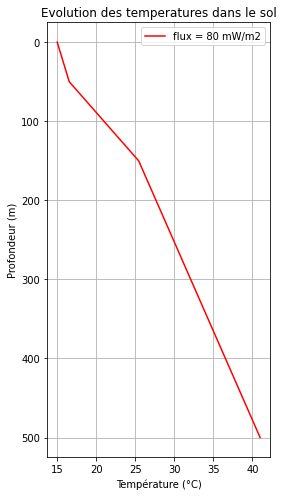

In [2]:

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

phi = 80e-3 #flux geothermique W/m2
theta_surf = 15 # °C
lbd = np.array([2.6, 0.9, 1.8])

z1 = np.arange(0, 51, 1)
z2 = np.arange(50, 151, 1)
z3 = np.arange(151, 501, 1)

theta_1 = theta_surf + phi * (z1)/lbd[0]
theta_2 = theta_1[50] + phi * (z2-np.max(z1))/lbd[1]
theta_3 = theta_2[100] + phi * (z3-np.max(z2))/lbd[2]

z = np.concatenate((z1,z2,z3),axis=0)
theta = np.concatenate((theta_1,theta_2,theta_3),axis=0)

plt.figure(figsize=(4,8))
plt.title('Evolution des temperatures dans le sol')
plt.xlabel('Température (°C)')
plt.ylabel('Profondeur (m)')
plt.grid()
plt.plot(theta, z, color = 'red', label='flux = 80 mW/m2')
plt.gca().invert_yaxis()
plt.legend()
plt.show()


## Propagation d'un signal thermique dans le sol I ##

On considère un sol homogène à l'équilibre thermique avec la surface à une température $\theta_0 = 10$°C, en l'absence de flux géothermique. La température en surface augmente soudainement de 3 °C.\
Une solution à l'équation de diffusivité pour un milieu 1D vertical pour la variation de température à la profondeur $z$ au temps $t$ peut s'écrire:
\begin{equation*}
	\Delta \theta(z,t) = \Delta \theta_0 erfc\left({}\frac{z}{2\sqrt{\kappa t}}\right)
\end{equation*}

avec $\kappa$ diffusivité thermique.

Le sol est constitué par une formation calcaire dont les propriétés thermiques sont les suivantes:
- conductivité thermique 1.6 W/m/K
- capacité thermique massique 885 J/Kg/K
- masse volumique $\rho = 2600 Kg/m3

Calculer et représenter le profil thermique dans le sous sol jusqu'à 100 mètres de profondeur au bout de 6 mois, 1 an, 5 ans, 10 ans et 50 ans

In [1]:
2600*885

2301000

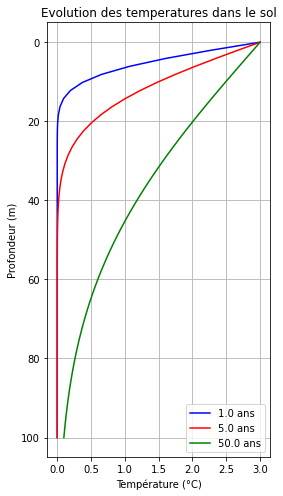

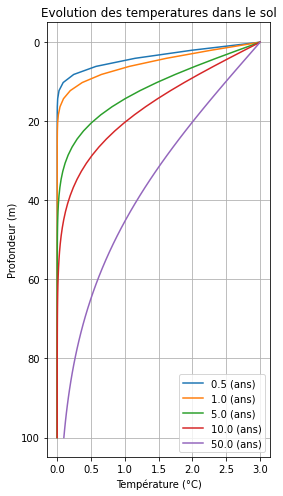

In [13]:

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

cm = 885 #J/kg/K cond. therm. mass. moyenne du sol
rho_m = 2600 #kg/m3 masse vol. du sol
Cm = 2.3e6 #J/m3/K chaleur vol. moyenne du sol
Cw = 4.18e6 #J/m3/K chaleur. therm. moyenne de l'eau
lm = 1.6 # W/m/K cond. therm. moyenne du sol

theta_0 = 3
z = np.linspace(0,100,50)
#t = np.array([0.5,1,5,10,50])
time = [0.5,1,5,10,50]

theta_1an = theta_0 * sp.erfc(z / 2 / np.sqrt(lm / (cm * rho_m) * time[1]*365*86400))
theta_5an = theta_0 * sp.erfc(z / 2 / np.sqrt(lm / (cm * rho_m) * time[2]*365*86400))
theta_50an = theta_0 * sp.erfc(z / 2 / np.sqrt(lm / (cm * rho_m) * time[4]*365*86400))

plt.figure(figsize=(4,8))
plt.title('Evolution des temperatures dans le sol')
plt.xlabel('Température (°C)')
plt.ylabel('Profondeur (m)')
plt.grid()
plt.plot(theta_1an,z,color = 'blue', label='{:.1f} ans'.format(time[1]))
plt.plot(theta_5an,z,color = 'red', label='{:.1f} ans'.format(time[2]))
plt.plot(theta_50an,z,color = 'green', label='{:.1f} ans'.format(time[4]))

plt.gca().invert_yaxis()
plt.legend()
plt.show()

#on peut simplifier en créant une boucle sur le tabelau des valeurs de t (utile si il y avait 50 valeurs de t !)
plt.figure(figsize=(4,8))
plt.title('Evolution des temperatures dans le sol')
plt.xlabel('Température (°C)')
plt.ylabel('Profondeur (m)')
plt.grid()
for t in time[:]:
    theta = theta_0 * sp.erfc(z / 2 / np.sqrt(lm / (cm * rho_m) * t*365*86400))
    plt.plot(theta, z,label='{:.1f} (ans)'.format(t))
    plt.gca().invert_yaxis()
plt.legend()
plt.show()



Estimer la profondeur de pénétration pour la chaleur issue du rayonnement diurne durant une journée d'été et estimer la profondeur de pénétration pour les températures observées durant la saison d'été.
La profondeur de pénétration $z_t$ est estimée à partir de la relation:
$$
z_t = \pi \sqrt{\kappa t}
$$

In [14]:
kappa = lm/Cm

t_jour = 12 * 3600 # 12h
t_ete = 120 * 86400 # 4 mois "chaud"
 
z_jour = np.pi * np.sqrt(kappa * t_jour)
z_ete = np.pi * np.sqrt(kappa * t_ete)

print('profondeur de penetration diurne = {:.1e} m'.format(z_jour))
print('profondeur de penetration saisonnière = {:.1e} m'.format(z_ete))


profondeur de penetration diurne = 5.4e-01 m
profondeur de penetration saisonnière = 8.4e+00 m


## Propagation d'un signal thermique dans le sol II ##

On souhaite estimer les propriétés thermiques d'un sol. On dispose d'un enregistrement journalier de température en surface dans l'air, obtenu à une station météorologique.
On dispose également de quelques mesures de température observées sur 2 sondes de température implantées à 2 profondeurs différentes.

On souhaite utiliser l'équation de diffusivité thermique pour procéder à l'estimation des paramètres.

1. A partir du fichier brut d'observations, représenter les températures observées en surface et en déduire les caractéristiques du signal de température atmosphérique.

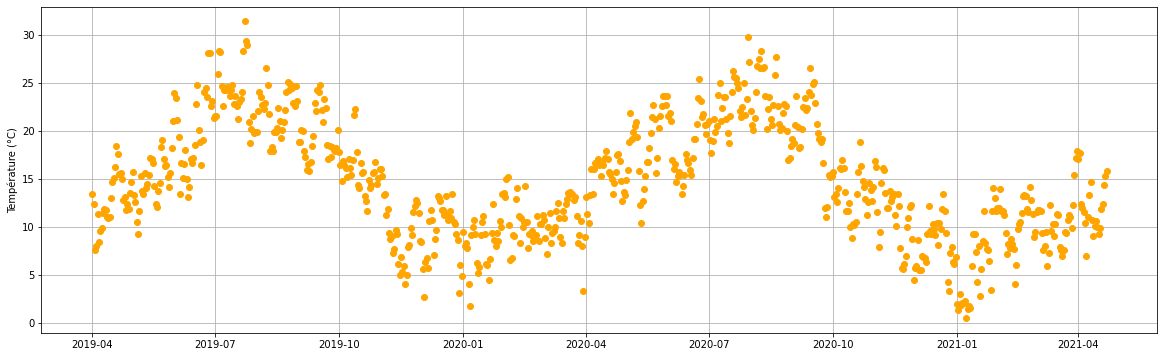

,temp
count,753.000000
mean,14.707703
std,6.013199
min,0.500000
25%,10.300000
50%,14.000000
75%,19.200000
max,31.400000


In [17]:

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

# on utilise un index temporel pour les fonctionnalites "time series" de la bibliotheque Pandas
idx = pd.date_range("2019-04-01", periods=753, freq="d")
theta_mes = pd.DataFrame(
    data={'temp': np.loadtxt("https://raw.githubusercontent.com/larroque852/NB_ENS3_geothermie/main/air_temperature.csv", delimiter=',', usecols=(2,), unpack=True)},
    index=idx)
#qqs fonctionnalités Pandas pour connaitre les données
#theta_mes.info()
#theta_mes.describe()

# Use seaborn style defaults and set the default figure size (pas obligatoire)
#sns.set(rc={'figure.figsize':(11, 4)})


#representation graphique donnees temperature mesurees
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(theta_mes['temp'],marker='o', linestyle='', color='orange', label='Journalier mes.')
ax.set_ylabel('Température (°C)')
ax.grid()
plt.show()

#caractéristiques des données chargées
theta_mes.describe()
#theta_mes.head()


2. Effectivement, le signal de température atmosphérique peut être assimilé à un signal périodique.

2. Effectivement, le signal de température atmosphérique peut être assimilé à un signal périodique.

Un modèle de signal périodique est de la forme:
$$ T(t) = \bar{T} + A cos\left[{\frac{2 \pi t}{t_0}}\right]$$
avec $\bar{T}$ température moyenne, $t_0$ durée d'un cycle complet de température, $A$ la demi-amplitude.

A partir de l'équation de diffusivité, pour un signal périodique en surface, la perturbation de température $\Delta T(z)$ à la profondeur $z$ peut être exprimée selon:

$$
\Delta T(z,t) = A exp\left[{-z\sqrt{\frac{\pi}{\kappa t_0}}}\right]cos\left[{\frac{2 \pi t}{t_0} - z\sqrt{\frac{\pi}{\kappa t_0}}}\right]
$$
avec $\kappa$ diffusivité thermique (m2/s)

A partir de quelle profondeur le signal thermique de surface peut il être négligé?

Le modèle proposé est:
Tmoyen air = 14.7 °C
Demi-amplitude A = 8 °C
Période t0 = 355 jours


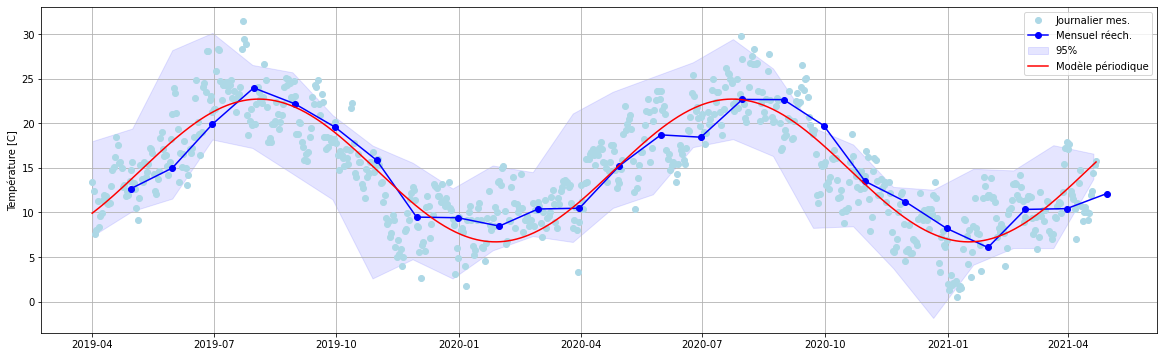

In [28]:
#hypothese modele cosinus --> theta = theta_mean + Acos( wt + lag)
# le lag sert à phaser le modèle temporellement avec les données
# les parametres doivent etre estimes à partir des donnees --> ajustement manuel

A = 8 #amplitude des variations de temperature à la surface [C]
t0 =  355  #(w = 2pi/t0)  duree d'un cycle de temperature en surface [j]
theta_air = 14.7 #temperature de l'air moyenne
lag = 180 #dephasage

time = np.linspace(0,753,753)
theta_mod = theta_air + A * np.cos((2*3.1415/t0)*time + lag)
theta_mod = pd.DataFrame(data={'temp_mod': theta_mod},index=idx)

#representation graphique
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(theta_mes['temp'],marker='o', linestyle='', color='lightblue', label='Journalier mes.')
ax.plot(theta_mes['temp'].resample('M').mean(),marker='o', markersize=6, color = 'b',linestyle='-',
        linewidth=1.5, label='Mensuel réech.')
#traitement basique - reechantillonnage 30 jours (30D) avec valeur moyenne
theta_mes30d=theta_mes.resample('30d').mean()
path_deviation = theta_mes.resample('30d').std()
#encadrement à 95% soit (moyenne +-2 x ecart-type)
ax.fill_between(path_deviation.index, (theta_mes30d-2*path_deviation)["temp"],
                (theta_mes30d+2*path_deviation)["temp"], label='95%', color='b', alpha=.1)
ax.plot(theta_mod, color='red', linestyle='-', label='Modèle périodique')
ax.set_ylabel('Température [C]')
ax.grid()
ax.legend();

print('Le modèle proposé est:')
print('Tmoyen air =', theta_air , '°C' )
print('Demi-amplitude A =', A , '°C' )
print('Période t0 =', t0 , 'jours' )


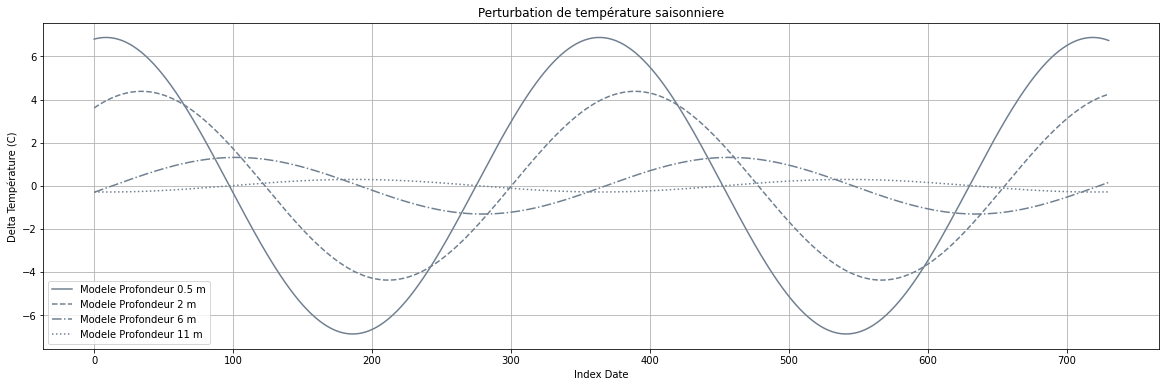

In [33]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

#####
#parametres du modele en surface atmospherique
A = 8 #amplitude des variations de temperature à la surface [C]
t0 =  355  #(w = 2pi/t0)  duree d'un cycle de temperature en surface [j]
thetaAir = 14.7 #temperature de l'air moyenne
lag = 180 #dephasage
#ajustement manuel des donnees

#creation modele analytique de transfert dans le sol
def Dtheta_sol(kappa,A,t0,z,t):
    Dtheta_sol = A * np.exp(-z*np.sqrt(3.1415/(kappa * t0)))* np.cos((2*3.1415*t/t0)-z*np.sqrt(3.1415/(kappa*t0)))
    return(Dtheta_sol)

t = np.linspace(0, 730, 731) #index journalier
lm = 2.6 #conductivite thermique [W/m/C] attention W --> J/s
Cm = 2.3e6 #capacite thermique volumetrique sol [J/K/m3]
kappa = (lm/Cm)*24*3600 #diffusivite thermique [m2/j]

curves = [0.5,2,6,11] #pour la legende --> doit etre conforme au nombre de courbes tracees
styles = ['-', '--', '-.', ':']
qt = []
for i in curves:
    qt.append(Dtheta_sol(kappa,A,t0,i,t));
   
plt.subplots(figsize=(20, 6))

for i in range(len(qt)):
    plt.plot(t, qt[i], styles[i],color='slategrey', label='Modele Profondeur ' + str(curves[i]) + ' m')
    plt.gca().set(title='Perturbation de température saisonniere', ylabel='Delta Température (C)', xlabel='Index Date')
plt.grid()
plt.legend()
plt.show()

4. Construire un graphique $T = f(z)$ permettant d'estimer l'amplitude des fluctuations temporelles durant une année climatique moyenne

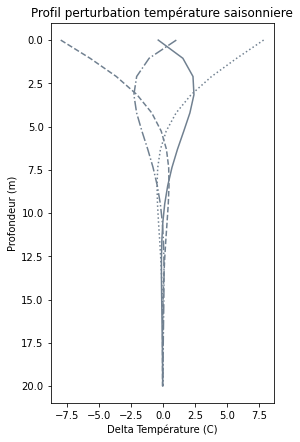

In [32]:

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

lm = 2.6 #conductivite thermique [W/m/C] attention W --> J/s
Cm = 2.3e6 #capacite thermique volumetrique [J/K/m3]
kappa = (lm/Cm)*24*3600 #diffusivite thermique [m2/j]

z = np.linspace(0, 20, 20)

styles = ['-', '--', '-.', ':']
curves = [91.25,182.5,273.75,365]
qz = []
for i in curves:
   qz.append(Dtheta_sol(kappa,A,t0,z,i));

plt.subplots(figsize=(4, 7))
for i in range(len(qz)):
   plt.plot(qz[i], z, styles[i],color='slategrey', label='temps ' + str(curves[i]) + ' j')
#    plt.plot(qz[i], z, styles[i],color='slategrey', label='temps ' + str(curve[i]) + ' j')
   plt.gca().set(title='Profil perturbation température saisonniere', ylabel='Profondeur (m)', xlabel='Delta Température (C)')
#plt.legend()
plt.gca().invert_yaxis()

En considérant un flux géothermique moyen $\phi$ = 80 mW/m^2 et une conductivité thermique homogène dans le sous sol $\lambda =2.6$ W/m/°C, construire le profil de température sur les 100 premiers mètres de profondeur.

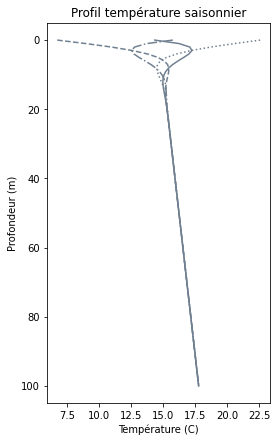

In [40]:
# avec un flux géothermique en plus
theta_surf = 14.7 #temperature moyenne surface du sol [C]
z = np.linspace(0, 100, 100)

# DT gradient géothermique
phi = 80e-3 #flux geothermique W/m2
z1 = np.arange(0, 71, 1)
Dtheta_geo = phi * (z)/lm

styles = ['-', '--', '-.', ':']
curves = [91.25,182.5,273.75,365]
qz = []
for i in curves:
   qz.append(Dtheta_sol(kappa,A,t0,z,i)+Dtheta_geo + theta_surf);

plt.subplots(figsize=(4, 7))
for i in range(len(qz)):
   plt.plot(qz[i], z, styles[i],color='slategrey', label='temps ' + str(curves[i]) + ' j')
#    plt.plot(qz[i], z, styles[i],color='slategrey', label='temps ' + str(curve[i]) + ' j')
   plt.gca().set(title='Profil température saisonnier', ylabel='Profondeur (m)', xlabel='Température (C)')
#plt.legend()
plt.gca().invert_yaxis()

plt.savefig('foo.png')

## Fonctionnement standard d'une pompe à chaleur ##
1. ***Système en mode "chauffage": *** un système de chauffage est basé sur un capteur géothermique en nappe relié à une pompe à chaleur. La température moyenne de l'eau de l'aquifère de surface est de 11°C. Après valorisation, l'eau prélevée est rejetée à l'aquifère à une température de 7°C. La chaleur extraite par le dispositif géothermique est optimisée par la pompe à chaleur afin de délivrer une température $\theta_{in}$ à l'intérieur. La pompe à chaleur a un coefficient de performance COP = 4.

En considérant un débit de pompage Q = 1 L/s, quelle est la puissance délivrable en interne pour chauffer le bâtiment et quelle est la puissance electrique associée nécessaire??

*Réponse*

- Puissance $H$ délivrée par la pompe à chaleur:
$$
H = G + E
$$
avec $G$ puissance de la source géothermique et $E$ puissance électrique
- COP de pompe à chaleur:
$$
COP = \frac{H}{E}
$$

L'énergie $G$ retirée du système géothermal sur aquifère est exprimé:
$$
G= Q \Delta \theta C_w
$$
avec $\Delta \theta = \theta_{out} - \theta_{inj}$ et $C_w$ chaleur volumique de l'eau



A partir de la définition de la COP, on peut exprimer la puissance G:

$$ G = H \left[{1 - \frac{1}{COP}}\right] $$

et donc pour la puissance délivrée $H$:

$$ H = G\left[{1 - \frac{1}{COP}}\right] $$

Comme:

$$ COP = \frac{H}{E} $$

La puissance électrique $E$ s'exprime:

$$ E = \frac{H}{COP} $$


In [45]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

theta_out = 11 #temperature pompage (=température aquifère)
theta_inj = 7 #temperature injection
Q = 1e-3 #m3/s
Cw = 4.2e6 #capacite thermique volumetrique eau [J/K/m3]
COP = 4 # performance pompe chaleur

#capteur géothermique
G = Q * (theta_out - theta_inj) * Cw #joule/s --> watt
#puissance pompe chaleur
H = G / (1 - 1 / COP)
#puissance électrique
E = H / COP

#print("Puissance produite par le capteur géothermique ={:.2e}".format(G),"J/s ou W")
print("Puissance produite par le capteur géothermique ={:.2e}".format(G/1000),"kW")
print("Puissance délivrée par la pompe à chaleur = {:.2e}".format(H/1000),"kW")
print("Puissance électrique nécessaire pour la pompe à chaleur = {:.2e}".format(E/1000),"kW")


Puissance produite par le capteur géothermique =1.68e+01 kW
Puissance délivrée par la pompe à chaleur = 2.24e+01 kW
Puissance électrique nécessaire pour la pompe à chaleur = 5.60e+00 kW


2. **Système en mode "rafraichissement":** on considère un pompage qui fournit un débit Q = 1 L/s d'une eau à la température de $\theta_{out}$ = 10°C. Un "effet froid" peut être obtenu par circulation passive du fluide dans le batiment. Cela se traduit par une augmentation de la température du fluide de 3°C. Quelle est la puissance de rafraichissement du domicile ainsi obtenue? Pour augmenter cet effetd e froid, on utilise une pompe à chaleur de COPc = 5.5 qui permet de valoriser un $\Delta \theta$  = 5 °C. Quelle est la puissance de rafraichissement du domicile obtenue et quelle est la consommation électrique associée?
La puissance de rafraichissement géothermique $C$ peut être définie:
$$
C = Q \Delta \theta C_w
$$
avec $\Delta \theta$ la différence de température entre eau pompée et eau en sortie de circuit de rafraichissement.

Avec une pompe à chaleur en mode froid actif, on valorise un $\Delta \theta$  = 5 °C avec une COPc = 5.5.
La puissance de rafraichissement s'exprime:
$$
C = \frac{Q \Delta \theta C_w}{1 + 1/COP_c}
$$


In [54]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
import math
#import seaborn as sns

Q = 1e-3 #m3/s
Cw = 4.2e6 #capacite thermique volumetrique eau [J/K/m3]
COP = 4 # performance pompe chaleur

### MODE FROID PASSIF
Dtheta1 = 3 # delta temperture rafraichissement sans pompe chaleur
Q = 1e-3 #m3/s
C = Q * Dtheta1 * Cw #joule/s --> watt
print("Puissance rafraichissement C ={:.2e}".format(C),"J/s")
print("Puissance rafraichissement C ={:.2e}".format(C/1000),"kW")

### MODE FROID ACTIF
COPc = 5.5
Dtheta2 = 5
C = Q * Dtheta2 * Cw / (1+1/COPc)
E = C / COPc
print("Puissance climatisation C ={:.2e}".format(C/1000),"kW")
print("Puissance electrique E ={:.2e}".format(E/1000),"kW")


Puissance rafraichissement C =1.26e+04 J/s
Puissance rafraichissement C =1.26e+01 kW
Puissance climatisation C =1.78e+01 kW
Puissance electrique E =3.23e+00 kW


## Dimensionnement d'un dispositif de géothermie très basse énergie - Dispositif vertical ##

On considère une maison particulière ancienne assez bien isolée d'une superficie de 120 m2, de 2.5 m de hauteur sous plafond et située sur un sol argileux sec.
La température hivernale locale peut atteindre les -6°C. La température de chauffage intérieure projetée est de 19°C.

La puissance P (W) à installer pour une habitation particulière peut être approchée par:
$$
P = G \times V \times \left[ Tint - Text \right]
$$
<figure>
  <IMG SRC="dim.png" WIDTH=500 ALIGN="center">
</figure>
    
La maison est située sur des formations constituées par des sables et graviers saturés.
Le dispositif de chauffage envisagé est constitué par un système de sondes verticales couplées en surface à une pompe à chaleur. La pompe à chaleur fournie dans le cahier des charges présente un coefficient de performance COP = 4.

<figure>
  <IMG SRC="sonde4.png" WIDTH=500 ALIGN="center">
</figure>
    

1. Calculer la puissance de chauffe du bâtiment.
2. Considérant un fonctionnement de pleine charge équivalent de 2400 heures, en fonction de la nature du terrain et d'après la legislation locale qui restreint la longueur de sonde maximale à 60 mètre, estimer le nombre de sonde nécessaire pour restituer la puissance de chauffe à l'entrée de la PAC.

In [58]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
import math as math

# CALCUL DE LA PUISSANCE DE CHAUFFE DU BATIMENT
Pchauffe = 1 * 120 * 2.5 * (19 - (-6))
cop =4
print('puissance de chauffe du batiment:', Pchauffe, 'Watts')

# CALCUL DE LA PUISSANCE GEOTHERMIQUE NECESSAIRE (AVEC PAC)
Pgeo = Pchauffe * (1 - 1/COP)
print('Puissance géothermique:', Pgeo, 'Watts')

P_lin = 60 #puissance lineique pour graviers et sables saturés
L = Pgeo /P_lin

print('longueur de sonde nécessaire: ', L , 'mètres')

Lmax = 60 #longueur max de sonde
print('Nombre de sonde nécessaire: ', math.ceil(L/Lmax) )


puissance de chauffe du batiment: 7500.0 Watts
Puissance géothermique: 5625.0 Watts
longueur de sonde nécessaire:  93.75 mètres
Nombre de sonde nécessaire:  2


3. On considère un écoulement orienté Ouest-Est de gradient hydraulique de l'ordre de 1 % à travers les graviers et sables. La conductivité hydraulique moyenne est de l'ordre de 10-6 m/s. La porosité efficace est de l'ordre de 15%. D'après la bibliographie, les propriétés thermiques du sol sont les suivantes:
- Cm = 2.3e6 J/m3/K chaleur vol. moyenne du sol
- Cw = 4.18e6 J/m3/K chaleur moyenne de l'eau
- lm = 1.6 W/m/K cond. therm. moyenne du sol

**Solution analytique pour l'impact d'une sonde infinie en milieu (modèle MILS) en régime permanent et gradient hydraulique, pour un point d'observation quelconque de coordonnées (x,y)**

$$	\Delta T(x,y) = \frac{q_{b}}{2 \pi \lambda_m}exp\left[{\frac{V_T x}{2\kappa}}\right] K_0 \left[{\frac{V_T\sqrt{x^2 + y^2}}{2\kappa}}\right]
$$
avec $q_b$ puissance linéique (W/m) extraite à la sonde, $V_T$ vitesse thermique dans le sens de l'écoulement, $\kappa$ diffusivité thermique du milieu souterrain, $K_0$ fonction de Bessel modifiée du second genre d'ordre 0

 - Programmer la solution et tester pour une sonde unique pour un point d'observation situé à la distance $x$ en aval hydraulique direct de la sonde thermique
 
- Proposer une cartographie de l'impact thermique sur une zone de coordonnées (Xmin = -20 m, Xmax = 100 m, Ymin = -50 m, Ymax = 50 m) pour le dispositif de sondes retenu.
Les coordonnées des sondes dans le repère cartésien sont:
sonde 1: Xsonde1 = 0 m et Ysonde1 = 5 m
sonde 2: Xsonde2 = 0 m et Ysonde2 = -5 m

- Quelles remarques pouvez vous faire sur les r&ésultats obtenus et quelle modification pourrait être portée pour améliorer les résultats?

In [93]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt


#Sonde unique pour un point d'observation situé à la distance $x$ en aval hydraulique direct de la sonde thermique
def sonde_inf_steady(x,lm,Cm,vT,qb):
    kappa = lm/Cm;
    return qb * (1 / 2 / 3.1415 / lm) * np.exp(vT * x / 2 / kappa) * sp.k0(vT * x / 2 /kappa)

lm = 1.6 # conductivité thermique milieu souterrain [W/m/K]
Cm = 2.4e6 #capacité thermiqsue volumique milieu souterrain [J/m3/K]
Cw = 4.2e6 ##capacité thermiqsue volumique eau [J/m3/K]
qb = -50 # puissance linéique de la sonde [W/m]
omega = 0.15 # porosite efficace
K = 1e-6 #conductivité hydraulique
i = 0.01 #gradient hydraulique
x = 10 #distance d'observation

# vitesse de pore [m/s]
vhyd = K * i / omega
#vhyd = 1.2 / 86400

#facteur de retard thermique RT
RT = Cm  / (Cw * omega) 
#vitesse thermique [m/s]
vT = (vhyd) / RT

test = sonde_inf_steady(x,lm,Cm,vT,qb)

print('vitesse de, pore', vhyd, 'm/s')
print('facteur de retard thermique', RT)
print('vitesse thermique', vT, 'm/s')
print('perturbation thermique à la distance x = ', x, 'm', ', DT = ', test, '°C')

vitesse de, pore 6.666666666666667e-08 m/s
facteur de retard thermique 3.8095238095238093
vitesse thermique 1.75e-08 m/s
perturbation thermique à la distance x =  10 m , DT =  -12.25090650973515 °C


vitesse de, pore 6.666666666666667e-08 m/s
facteur de retard thermique 3.8095238095238093
vitesse thermique 1.75e-08 m/s
perturbation thermique à la sonde 1 DT1 =  -29.319265902425897 °C
perturbation thermique à la sonde 1 DT1 =  -29.319265902425865 °C


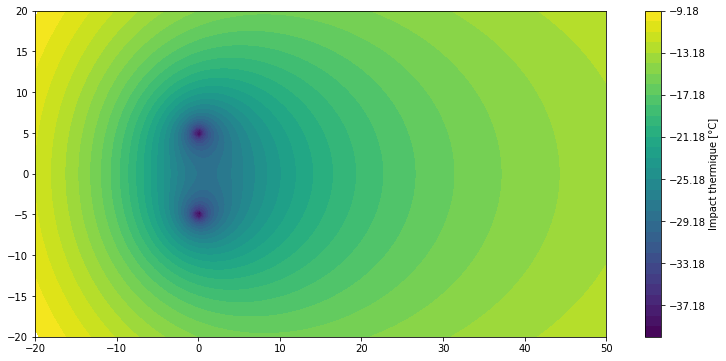

In [116]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt

#Impact sonde unique de coordonnées (x,y,X0,Y0) pour un point d'observation situé aux coordonnées (x,y) en aval hydraulique direct de la sonde thermique
def sonde_inf_steady(x, y, X0, Y0, lm,Cm,vT,qb):
    kappa = lm/Cm;
    r = np.sqrt((x-X0) ** 2 + (y-Y0) ** 2)
    return qb * (1 / 2 / 3.1415 / lm) * np.exp(vT * (x-X0) / 2 / kappa) * sp.k0(vT * r / 2 /kappa)

lm = 1.6 # conductivité thermique milieu souterrain [W/m/K]
Cm = 2.4e6 #capacité thermiqsue volumique milieu souterrain [J/m3/K]
Cw = 4.2e6 ##capacité thermiqsue volumique eau [J/m3/K]
qb = -50 # puissance linéique de la sonde [W/m]
omega = 0.15 # porosite efficace
K = 1e-6 #conductivité hydraulique
i = 0.01 #gradient hydraulique

# vitesse de pore [m/s]
vhyd = K * i / omega
#facteur de retard thermique RT
RT = Cm  / (Cw * omega) 
#vitesse thermique [m/s]
vT = (vhyd) / RT

# cartographie DT en permanent
#definition de la grille de Xmin à Xmax, et de Ymin à Ymax
Xmin = -20
Xmax = 50
xgrid_len = 140
Ymin = -20
Ymax = 20
ygrid_len = 80

#création du maillage
xi = np.linspace(Xmin, Xmax, xgrid_len)                                    
yi = np.linspace(Ymin, Ymax, ygrid_len)                                    
xi, yi = np.meshgrid(xi, yi)

# position des sondes
#sonde 1
X1 = 0
Y1 = 5
#sonde 2
X2 = 0
Y2 = -5

#impact thermique des sondes
sonde1 = sonde_inf_steady(xi, yi, X1, Y1, lm,Cm,vT,qb)
sonde2 = sonde_inf_steady(xi, yi, X2, Y2, lm,Cm,vT,qb)
impact = sonde1 + sonde2
fig, axs = plt.subplots(1,1, figsize=(14,6))
cf = plt.contourf(xi,yi,impact,np.arange(impact.min(),impact.max(),1))
axs.set_aspect('equal')
fig.colorbar(cf, label = "Impact thermique [°C]")
plt.plot

print('vitesse de, pore', vhyd, 'm/s')
print('facteur de retard thermique', RT)
print('vitesse thermique', vT, 'm/s')
print('perturbation thermique à la sonde 1 DT1 = ', sonde1.min(), '°C')
print('perturbation thermique à la sonde 1 DT1 = ', sonde2.min(), '°C')


REMARQUE: les impacts thermiques semblent très importants. La solution analytique calcule l'impact de la sonde en régime permanent. Hors la puissance linéique retenue pour chaque sonde corresponds à une extraction de 2400h/an.

Il faut recalculer une puissance linéique équivalente lissée sur une année moyenne pour utiliser la solution analytique.
On peut ensuite relancer la solution 2D pour les deux sondes.

vitesse de, pore 6.666666666666667e-08 m/s
facteur de retard thermique 3.8095238095238093
vitesse thermique 1.75e-08 m/s
perturbation thermique à la sonde 1 DT1 =  -8.032675589705724 °C
perturbation thermique à la sonde 1 DT1 =  -8.032675589705715 °C


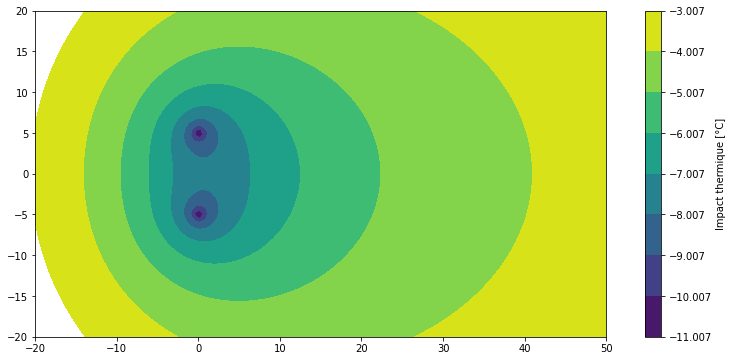

In [127]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt

#Impact sonde unique de coordonnées (x,y,X0,Y0) pour un point d'observation situé aux coordonnées (x,y) en aval hydraulique direct de la sonde thermique
def sonde_inf_steady(x, y, X0, Y0, lm,Cm,vT,qb):
    kappa = lm/Cm;
    r = np.sqrt((x-X0) ** 2 + (y-Y0) ** 2)
    return qb * (1 / 2 / 3.1415 / lm) * np.exp(vT * (x-X0) / 2 / kappa) * sp.k0(vT * r / 2 /kappa)

lm = 1.6 # conductivité thermique milieu souterrain [W/m/K]
Cm = 2.4e6 #capacité thermiqsue volumique milieu souterrain [J/m3/K]
Cw = 4.2e6 ##capacité thermiqsue volumique eau [J/m3/K]
qb = -50 # puissance linéique de la sonde [W/m]
omega = 0.15 # porosite efficace
K = 1e-6 #conductivité hydraulique
i = 0.01 #gradient hydraulique
# vitesse de pore [m/s]
vhyd = K * i / omega
#vhyd = 1.2 / 86400
#facteur de retard thermique RT
RT = Cm  / (Cw * omega) 
#vitesse thermique [m/s]
vT = (vhyd) / RT

#lissage de la puissance linéique sur une année moyenne
qbm = (qb) * (2400/ (24 * 365))


# cartographie DT en permanent
#definition de la grille de Xmin à Xmax, et de Ymin à Ymax
Xmin = -20
Xmax = 50
xgrid_len = 140
Ymin = -20
Ymax = 20
ygrid_len = 80

#création du maillage
xi = np.linspace(Xmin, Xmax, xgrid_len)                                    
yi = np.linspace(Ymin, Ymax, ygrid_len)                                    
xi, yi = np.meshgrid(xi, yi)

# position des sondes
#sonde 1
X1 = 0
Y1 = 5
#sonde 2
X2 = 0
Y2 = -5

#impact thermique des sondes
sonde1 = sonde_inf_steady(xi, yi, X1, Y1, lm,Cm,vT,qbm)
sonde2 = sonde_inf_steady(xi, yi, X2, Y2, lm,Cm,vT,qbm)
impact = sonde1 + sonde2
fig, axs = plt.subplots(1,1, figsize=(14,6))
cf = plt.contourf(xi,yi,impact,np.arange(impact.min(),impact.max(),1))

axs.set_aspect('equal')
fig.colorbar(cf, label = "Impact thermique [°C]")
plt.plot

print('vitesse de, pore', vhyd, 'm/s')
print('facteur de retard thermique', RT)
print('vitesse thermique', vT, 'm/s')
print('perturbation thermique à la sonde 1 DT1 = ', sonde1.min(), '°C')
print('perturbation thermique à la sonde 1 DT1 = ', sonde2.min(), '°C')


4. Comportement transitoire du champ de sondes
**Solution analytique pour l'impact d'une sonde infinie en milieu (modèle MILS) en régime transitoire et gradient hydraulique, pour un point d'observation quelconque de coordonnées (x,y) au temps d'observation $t$**
$$
T(x,y,t) = T_0 + \frac{q_{tb}}{4 \pi \lambda_m} exp\left[{\frac{v_t x}{16 D_t^2 \psi}}\right]\int_{r^2 / 4 D_t t}^{\infty} exp\left[{-\psi - \frac{v_t^2r^2}{2 D_t}}\right] \, \frac{\mathrm{d}\psi}{\psi}
$$

A partir de cette solution, estimer l'impact thermique du doublet de sondes à un point d'observation quelconque pour une période de 100 ans.

*Attention au repérage cartésien de votre point d'observation et à la manière où il sera codé dans le cadre d'un système composé de 2 sondes*

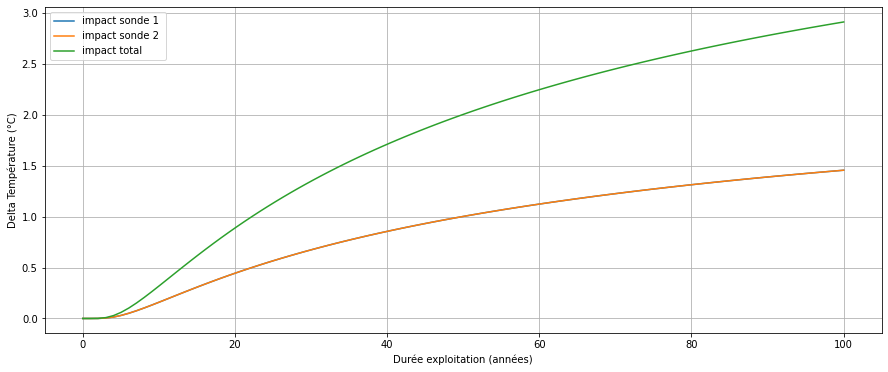

In [136]:
from scipy.integrate import quad  # Module d'intégration "quad"

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

def sonde_inf_trans(x, y, X0, Y0, lm,Cm,vT,qb,t):
    kappa = lm/Cm;
    r1 = ((x-X0) ** 2 + (y-Y0) ** 2)
    def kernel(psi):
        return (1/psi) * np.exp(-psi-vT ** 2 * r1 / 16 / kappa ** 2 / psi)
    return qb*(1/4/3.1415/lm) * np.exp(vT * x / 2 / kappa) * (quad(kernel,r1 / 4 / kappa /t,np.inf)[0])

lm = 1.6 # conductivité thermique milieu souterrain [W/m/K]
Cm = 2.4e6 #capacité thermiqsue volumique milieu souterrain [J/m3/K]
Cw = 4.2e6 ##capacité thermiqsue volumique eau [J/m3/K]
qb = -50 # puissance linéique de la sonde [W/m]
omega = 0.15 # porosite efficace
K = 1e-6 #conductivité hydraulique
i = 0.01 #gradient hydraulique
# vitesse de pore [m/s]
vhyd = K * i / omega
#vhyd = 1.2 / 86400
#facteur de retard thermique RT
RT = Cm  / (Cw * omega) 
#vitesse thermique [m/s]
vT = (vhyd) / RT

# position des sondes
#sonde 1
X1 = 0
Y1 = 5
#sonde 2
X2 = 0
Y2 = -5
#Puissance linéique "moyenne"
qb = 50 
qbm = (qb) * (2400/ (24 * 365))

#periode d'observation
t = np.linspace(0.01,100,100) #durée d'observation [annees]

#attention aux coordonnées du point d'observation: elles doivent être relative à la sonde considérée (faire un schéma dans un repere cartésien!)
# (ici un point d'observation M situé à 30 mètres vers l'Est à égale distance entre les 2 sondes)
DTt1 = []
DTt2 = []
DTt_total = []
for i in t:
    DTt1.append(sonde_inf_trans(30, -5, X1, Y1, lm,Cm,vT,qbm,i*86400*365))
    DTt2.append(sonde_inf_trans(30, 5, X2, Y2, lm,Cm,vT,qbm,i*86400*365))

#DTt_1 = np.array([DTt1])
#DTt_2 = np.array([DTt2])
#time = np.array([t])
#DTt_total = DTt_1 + DTt_2
DTt_total = [sum(i) for i in zip(DTt1,DTt2)]

fig, ax = plt.subplots(figsize=(15, 6))
ax.set_ylabel('Delta Température (°C)')
ax.set_xlabel('Durée exploitation (années)')
ax.plot(t, DTt1, label='impact sonde 1 ')
ax.plot(t, DTt2, label='impact sonde 2 ')
ax.plot(t, DTt_total, label='impact total ')

#ax.plot(time, DTt_total, label='impact total')

ax.legend()
ax.grid()
plt.show()              


## Dimensionnement d'un dispositif de géothermie très basse énergie sur nappe ##

### Caractérisation hydrogéologique ###
On considère un aquifère libre de transmissivité constante $T =$ 150 m2/s et d'épaisseur de 75 mètres. La porosité efficace est de 10%. Le gradient hydraulique ouest-est est de l'ordre de 0.01.

La capacité volumétrique moyenne de l'aquifère est $C_m$ = 2.3e6 J/m3/K et celle de l'eau est $C_w$ = 4.18e6 J/m3/K.

On considère un puits de rayon $r$ = 100 mm qui capte l'aquifère. Le puits sera pompé pour la période de chauffage durant 180 jours au débit de 10 L/s. Quel rabattement est envisageable au puits de production? Quelle critique peut on formuler sur ce résultat?

L'eau prélevée est réinjectée dans un puits situé à $d$ = 100 mètres en aval hydraulique du puits de pompage. Quel est gradient hydraulique attendu entre les deux ouvrages en l'absence de gradient hydraulique?


In [171]:
import numpy as np
import pandas as pd
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt

#conditions de l'essai
Q = 10 # débit (L/s)
#rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits
rw = 1 #distance observation hypothetique proche periphérie du puits
t = 180 # (j)
#aquifère
T = 150 #m2/j
S = 0.1 # (-)

#cohenrece unités
Q = Q * 1e-3 * 24 *3600 #m3/j

## CARACTERISATION DU PUITS DE PRODUCTION ####################################

#rabattement puits prod s_rw formule theis
s_theis_rw = Q / (4 * np.pi * T) * sp.exp1((rw ** 2 * S)/ (4 * T * t))
print("Rabattement au puits de pompage (Theis) {:.2e}".format(s_theis_rw),"mètres")

#rabattement puits prod formule jacob + verif u
s_jacob_rw = 2.3 * Q / (4 * np.pi * T) * np.log10((2.25 * T * t) / (rw ** 2 * S))
print("Rabattement au puits de pompage (Jacob) {:.2e}".format(s_jacob_rw),"mètres")
print('Vérification de la valeur de $u$ (<0.01 ?) - u = ', rw ** 2 * S / 4 / T / t)

## CARACTERISATION DU DOUBLET ####################################

# distance entre 2 ouvrages = 100m
d1 = 100 #distance puits reinjection (m)

t = 180 # (j)

#calcul différence hydraulique entre puits prod/inj en l'absence de gradient hydraulique
# puits de pompage
s_out = 2.3 * Q / (4 * np.pi * T) * np.log10((2.25 * T * t) / (rw ** 2 * S))
#puits d'injection à d
s_in1 = 2.3 * -Q / (4 * np.pi * T) * np.log10((2.25 * T * t) / (rw ** 2 * S))

Dh_doublet = abs(s_out) + abs(s_in1)

print("Delta h entre le puits de pompage et le puits d'injection (Jacob - pas d'écoulement nat.):  {:.2e}".format(Dh_doublet),"mètres")


Rabattement au puits de pompage (Theis) 6.10e+00 mètres
Rabattement au puits de pompage (Jacob) 6.10e+00 mètres
Vérification de la valeur de $u$ (<0.01 ?) - u =  9.25925925925926e-07
Delta h entre le puits de pompage et le puits d'injection (Jacob - pas d'écoulement nat.):  1.22e+01 mètres


Réaliser un document présentant:
- une carte piézométrique du régime d'écoulement naturel non influencé (Houest = 50 mNG)
- une carte d'impact hydraulique après 180 jours d'exploitation du doublet
- une carte piézométrique synthétique présentant l'impact de 180 jours d'exploitation du doublet sur la nappe.

On considérera les caractéristiques géographiques suivantes pour le domaine:
- dimensions du domaine de représentation: ordonnées 0 - 500 m ; abscisses 0 - 400 m
- coordonnées du champ captant (coordonnées cartésiennes)
    - Forage de production (200,200)
    - Forage d'injection (300,200)


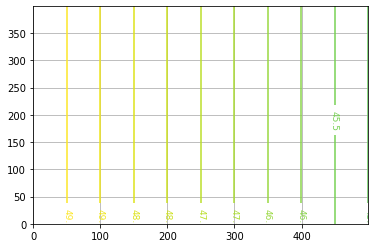

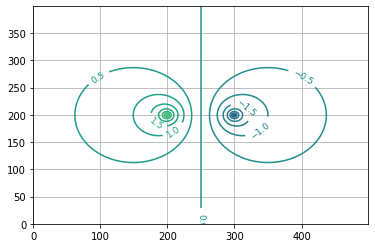

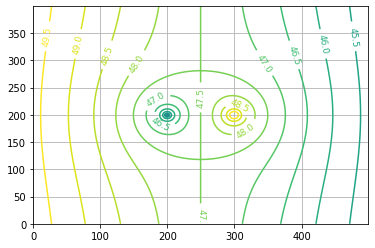

In [172]:
import numpy as np
import pandas as pd
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt

Q = 10 # débit (L/s)
#cohenrece unités
Q = Q * 1e-3 * 24 *3600 #m3/j

#rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits
rw = 1 #distance observation hypothetique proche periphérie du puits

t = 21 # (j)

#aquifère
T = 150 #m2/j
S = 2e-3 # (-)

#creation d'une grille de calcul 600 x 600
x = np.linspace(0,500,500)
y = np.linspace(0,400,400)
X, Y = np.meshgrid(x, y)

#champ captant
x_Fout = 200 # m
y_Fout = 200 #
x_Fin = 300 #
y_Fin = 200 #
Qout = Q #m3/j
Qin = -Q #m3/j
t = 180 # duree pompage/injection(j)


#carte piézométrique initiale
#ecoulement naturel
H = 50 # H (mNG) de reference
H1 = H - 1e-2 * X #gradient regional  orienté ouest-est
#H1 = H - 2e-2 * X - 1e-2 * Y#gradient regional  avec un angle alpha (composante x + composante y)
level = np.arange(30,50,0.5) #valeur des iso (min,max,delta)
map = plt.contour(H1,level)
plt.clabel(map, fontsize=9, inline=1)
plt.grid()
plt.show()


#Impact - calcul avec la fonction de Theis
r_Fout = np.sqrt((X-x_Fout) ** 2 + (Y-y_Fout) ** 2)
u_Fout = r_Fout**2. * S / (4 * (T) * (t))
s_Fout = Qout/(4 * np.pi * (T)) * sp.exp1(u_Fout)

r_Fin = np.sqrt((X-x_Fin) ** 2 + (Y-y_Fin) ** 2)
u_Fin = r_Fin**2. * S / (4 * (T) * (t))
s_Fin = Qin/(4 * np.pi * (T)) * sp.exp1(u_Fin)

level = np.arange(-10,10,0.5) #valeur des iso (min,max,delta)
map = plt.contour(s_Fout+s_Fin,level)
plt.clabel(map, fontsize=9, inline=1)
plt.grid()
plt.show()

#carte piézométrique impactée
h = H1 - s_Fout -s_Fin
level = np.arange(40,50,0.5) #valeur des iso (min,max,delta)
map = plt.contour(h,level)
plt.clabel(map, fontsize=9, inline=1)
plt.grid()
plt.show()

3. Caractérisation thermique et hydraulique du doublet
- puissance de chauffe fournie au bâtiment
- beta
$$
\beta = \frac{2Q}{T \pi L i}
$$
- fraction recyclage hydraulique
$$
f_{hyd} =1 - \frac{2}{\pi}\left[ {tan^{-1} \left( {\frac{1}{\sqrt{\beta - 1}}} + \frac{\sqrt{\beta - 1}}{\beta} \right)} \right]
$$
- temps d'arrivée front hydraulique au puits $t^F_{hyd}$:
$$
t^F_{hyd} = \frac{n_e d}{K i}\left[ {\frac{\beta}{\sqrt{\beta-1}}} tan^{-1} \left( {\frac{1}{\sqrt{\beta - 1}}} \right) -1 \right]
$$
- temps d'arrivée front thermique au puits $t^F_{hyd}$:
$$
t_{the} = \frac{C_{aq}}{C_w} \frac{d}{K i}\left[ {\frac{\beta}{\sqrt{\beta - 1}}} tan^{-1} \left( {\frac{1}{\sqrt{\beta - 1}}} \right) - 1 \right]
$$


In [138]:
import numpy as np
import pandas as pd
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt

Cm = 2.4e6 #capacité thermiqsue volumique milieu souterrain [J/m3/K]
Cw = 4.2e6 ##capacité thermiqsue volumique eau [J/m3/K]

#Caractéristiques du système d'exploitation
#Performance PAC
COP = 4
#Valorisation thermique PAC
DT = 10 #°C
#Débit de pompage du doublet
Q = 10 * 1e-3 #m3/s
#puissance de chauffe delivree
Pchaud = Q * Cw * DT * (1 / (1-1/COP))
print('Puissance de chauffe délivrée au batiment:', Pchaud, 'Watt') #Watt

Puissance de chauffe délivrée au batiment 560000.0 Watt


In [1]:
import numpy as np
import pandas as pd
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt

Cm = 2.3e6 #volumetric heat capacity of the porous medium [J/m3/K] 
Cw = 4.18e6 #capacite thermique volumetrique eau [J/K/m3]

omega = 0.1 #porosite efficace
i = 1e-2 #gradient hydraulique W-E
Q = 10 # débit (L/s)

#rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits
rw = 1 #distance observation hypothetique proche periphérie du puits

L = 100 #distance doublet metre
Dh = 12 # delta h entre puits inj et puits out
#aquifère
T = 150 #m2/j
b = 75 # (m)
K = T / b # m/j

#cohenrece unités ==> on garde les jours comme unité de temps
Q = Q * 1e-3 * 24 * 3600 #m3/j

#CALCUL SANS GRADIENT HYDRAULIQUE

tF_hyd_nul1 = L ** 2 * omega / (K * Dh)
print("Gradient nul Approche Darcy - temps d'arrivée front hydraulique {:.2e}".format(tF_hyd_nul1),"jours")

tF_hyd_nul2 = 3.1415 * omega * b * L **2 / 3 / Q
print("Gradient nul Approche géométrique - temps d'arrivée front hydraulique {:.2e}".format(tF_hyd_nul2),"jours")

#CALCUL AVEC GRADIENT HYDRAULIQUE
# si beta > 1 alors recyclage
beta = 2 * Q / (T * np.pi * i * L)
print('valeur beta:', beta)
#temps d'arrivee front hydraulique au puits avec gradient regional (jour)
tF_hyd = (L * omega / K / i) * ((beta / np.sqrt(beta - 1)) * np.arctan(1 / np.sqrt(beta - 1)) - 1)
print("temps d'arrivée front hydraulique {:.2e}".format(tF_hyd),"jours")

#temps d'arrivee thermique au puits avec gradient regional (jour)
tF_therm = (Cm / Cw) * (L / K / i) * ((beta / np.sqrt(beta - 1)) * np.arctan(1 / np.sqrt(beta - 1)) - 1)
print("temps d'arrivée front thermique {:.2e}".format(tF_therm),"jours")

#FRACTION RECYCLAGE HYDRAULIQUE
f_hyd = 1 -(2 / np.pi)*   (np.arctan(1 / np.sqrt(beta - 1)) + np.sqrt(beta - 1) / beta)

print("fraction de recyclage hydraulique {:.1e}".format(f_hyd * 100),"%")



Gradient nul Approche Darcy - temps d'arrivée front hydraulique 4.17e+01 jours
Gradient nul Approche géométrique - temps d'arrivée front hydraulique 9.09e+01 jours
valeur beta: 3.666929888837269
temps d'arrivée front hydraulique 1.17e+02 jours
temps d'arrivée front thermique 6.43e+02 jours
fraction de recyclage hydraulique 3.7e+01 %


- Evolution température au puits de pompage post-percée thermique

temps d'arrivée front thermique 6.43e+02 jours


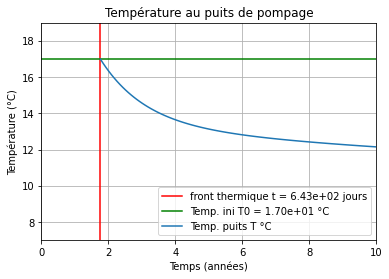

In [3]:
import numpy as np
import pandas as pd
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt

Cm = 2.3e6 #volumetric heat capacity of the porous medium [J/m3/K] 
Cw = 4.18e6 #capacite thermique volumetrique eau [J/K/m3]

omega = 0.1 #porosite efficace
i = 1e-2 #gradient hydraulique W-E
Q = 10 # débit (L/s)
rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits

L = 100 #distance doublet metre
Dh = 7 # delta h entre puits inj et puits out
#aquifère
T = 150 #m2/j
b = 75 # (m)
K = T / b # m/j

#cohenrece unités ==> on garde les jours comme unité de temps
Q = Q * 1e-3 * 24 * 3600 #m3/j


#temperature
theta_0 = 17 # °C temperature initiale aquifere
theta_inj = 7 # °C temperature reinjection

#CALCUL AVEC GRADIENT HYDRAULIQUE
#temps arrivee front thermique
#t_the = np.pi * b * d ** 2 /3 * Cm / Cw / Q # sans ecoulement regional
beta = 2 * Q / (T * np.pi * i * L)
t_the = (Cm / Cw) * (L / K / i) * ((beta / np.sqrt(beta - 1)) * np.arctan(1 / np.sqrt(beta - 1)) - 1) #avec ecoulement regional

print("temps d'arrivée front thermique {:.2e}".format(tF_therm),"jours")

#evolution temperature post-percee au puits de pompage
# temps doit etre en années
t = np.linspace(t_the/365,10,100)

t_out = (0.338 * np.exp(-0.0023*(t/(t_the/365))) + 0.337 * np.exp(-0.1093 * t/(t_the/365))
         + 1.368 * np.exp(-1.3343*t/(t_the/365))) * (theta_0 - theta_inj) + theta_inj

plt.title('Température au puits de pompage')
plt.xlabel('Temps (années)')
plt.xlim(0, 10)
plt.ylim(theta_inj, theta_0 + 2)
plt.ylabel('Température (°C)')
plt.grid()
plt.axvline(x=t_the/365, color = 'red', label='front thermique t = {:.2e} jours'.format(t_the))
plt.axhline(y=theta_0, color = 'green', label='Temp. ini T0 = {:.2e} °C'.format(theta_0))

plt.plot(t,t_out, label='Temp. puits T °C')
plt.legend()
plt.show()

3. L'aquifère précédent a une épaisseur de 75 mètres. Le gradient hydraulique ouest-est est de l'ordre de 0.01. On injecte un traceur chimique dans le puits de ré-injection. Dans ce puits, l'eau injectée au puits de reinjection est refroidie de 10°C. Au bout de combien de temps le traceur atteindra un piézométre situé à 150 mètres dans le sens de l'écoulement. Combien de temps mettra le front thermique à atteindre ce piézomètre?



In [43]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

Cm = 2.4e6 #volumetric heat capacity of the porous medium [J/m3/K] 
Cw = 4.18e6 #capacite thermique volumetrique eau [J/K/m3]

#aquifère
T = 150 #m2/j
b = 75 # (m)
K = T / b # m/j
omega = 0.1 #porosite efficace
i = 1e-2 #gradient hydraulique W-E --> idealement il faudrait prendre en compte le nouveau gradient local du à l'injection si grosse perturbation

#dispositif
Q = 10 # débit (L/s)
rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits
d_p = 150 #distance piezometre

#cohenrece unités SI
Q = Q * 1e-3 * 24 * 3600 #m3/j

#vD vitesse, Darcy m/j
vD = (T/b) * i
#u vitesse reelle m/j
u = vD/omega
print(u)

#facteur de retard thermique
R_t = (Cm / (omega * Cw))
print(R_t)
vT = u / R_t
print(vT)

#duree apparition du traveur à d piezometre (secondes)
t_hyd = d_p / u #jours
print("temps d'arrivée front hydraulique {:.2e}".format(t_hyd),"jours")

#duree apparition front thermique (secondes)
t_therm = t_hyd * R_t
print("temps d'arrivée front thermique {:.2e}".format(t_therm),"jours")


0.19999999999999998
5.741626794258373
0.034833333333333334
temps d'arrivée front hydraulique 7.50e+02 jours
temps d'arrivée front thermique 4.31e+03 jours


## Fonctionnement standard d'un doublet - FEFLOW ##

### Comparaison modèle FEFLOW avec solutions analytiques

Le modèle conceptuel utilisé est inspiré des hypothèses de [ *Pophillat, W., Attard, G., Bayer, P., Hecht-Méndez, J., & Blum, P. (2020). Analytical solutions for predicting thermal plumes of groundwater heat pump systems. Renewable Energy, 147, 2696-2707.*]
Il présente les caractéristiques suivantes:

**Aquifère**
- Aquifère captif homogène;
- Epaisseur constante $b =$ 10 mètres;
- Conductivité hydrauliqiue $K =$ 1e-5 m/s;
- Porosité efficace $n_e =$ 0.3;
- Gradient hydraulique régional $i =$ 5e-3;

**Thermique**
- Conductivité thermique aquifère $l_m =$ 2.24 W/m/K
- Conductivité thermique éponte $l_s =$ 4 W/m/K
- Conductivité thermique fluide $l_w =$ 0.578 W/m/K
- Capacité thermique volumique aquifère $C_m =$ 2.88.2e6 J/m3/K  
- Capacité thermique volumique éponte $C_s =$ 2.332e6 J/m3/K  
- Capacité thermique volumique fluide $C_w =$ 4.2e6 J/m3/K  
- Dispersivité thermique longituditunale $\alpha_L =$ 1 m
- Dispersivité thermique transversale $\alpha_T =$ 0.1 m


**Doublet**
- espacement $L =$ 80 m
- Débit pompage / injection $+- Q =$ 0.6 L/s




In [51]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

Cm = 2.88e6 #volumetric heat capacity of the porous medium [J/m3/K] 
Cw = 4.18e6 #capacite thermique volumetrique eau [J/K/m3]

omega = 10e-2 #porosite efficace
i = 5e-3 #gradient hydraulique W-E
Q = 0.6 # débit (L/s)
rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits

d = 80 #distance doublet metre

#aquifère
T = 8.64 #m2/j
b = 10 # (m)
K = T / b # m/j

#temperature
theta_0 = 15 # °C temperature initiale aquifere
theta_inj = 5 # °C temperature reinjection

#cohenrece unités SI
Q = Q * 1e-3 * 24 * 3600 #m3/j

#CALCUL AVEC GRADIENT HYDRAULIQUE
# si beta > 1 alors recyclage
beta = 2 * Q / (T * np.pi * i * d)

#temps d'arrivee front hydraulique au puits avec gradient regional (jour)
tF_hyd = (d * omega / K / i) * ((beta / np.sqrt(beta - 1)) * np.arctan(1 / np.sqrt(beta - 1)) - 1)
print("temps d'arrivée front hydraulique {:.2e}".format(tF_hyd),"jours")

#temps d'arrivee thermique au puits avec gradient regional (jour)
tF_therm = (Cm / Cw) * (d / K / i) * ((beta / np.sqrt(beta - 1)) * np.arctan(1 / np.sqrt(beta - 1)) - 1)
print("temps d'arrivée front thermique {:.2e}".format(tF_therm),"jours")

#FRACTION RECYCLAGE HYDRAULIQUE
f_hyd = 1 -(2 / np.pi)*((np.arctan(1 / np.sqrt(beta - 1))) + (np.sqrt(beta - 1)) / beta)

print("fraction de recyclage hydraulique {:.1e}".format(f_hyd * 100),"%")



temps d'arrivée front hydraulique 1.41e+02 jours
temps d'arrivée front thermique 9.73e+02 jours
fraction de recyclage hydraulique 6.0e+01 %


temps d'arrivée front thermique 8.11e+02 jours


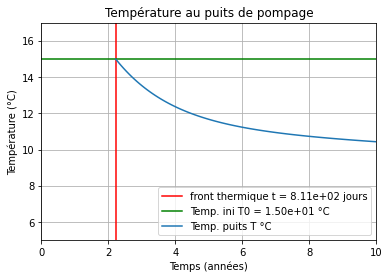

In [50]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

Cm = 2.4e6 #volumetric heat capacity of the porous medium [J/m3/K] 
Cw = 4.18e6 #capacite thermique volumetrique eau [J/K/m3]

omega = 30e-2 #porosite efficace
i = 5e-3 #gradient hydraulique W-E
Q = 6 # débit (L/s)
rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits

d = 80 #distance doublet metre

#aquifère
T = 8.64 #m2/j
b = 10 # (m)
K = T / b # m/j

#temperature
theta_0 = 15 # °C temperature initiale aquifere
theta_inj = 5 # °C temperature reinjection

#cohenrece unités SI
Q = Q * 1e-3 * 24 * 3600 #m3/j
                                           
#CALCUL SANS GRADIENT HYDRAULIQUE
#temps arrivee front thermique
#t_the = np.pi * b * d ** 2 /3 * Cm / Cw / Q # sans ecoulement regional
t_the = (Cm / Cw) * (d / K / i) * ((beta / np.sqrt(beta - 1)) * np.arctan(1 / np.sqrt(beta - 1)) - 1) #avec ecoulement regional

print("temps d'arrivée front thermique {:.2e}".format(tF_therm),"jours")

#evolution temperature post-percee au puits de pompage
# temps doit etre en années
t = np.linspace(t_the/365,10,100)

t_out = (0.338 * np.exp(-0.0023*(t/(t_the/365))) + 0.337 * np.exp(-0.1093 * t/(t_the/365))
         + 1.368 * np.exp(-1.3343*t/(t_the/365))) * (theta_0 - theta_inj) + theta_inj

plt.title('Température au puits de pompage')
plt.xlabel('Temps (années)')
plt.xlim(0, 10)
plt.ylim(theta_inj, theta_0 + 2)
plt.ylabel('Température (°C)')
plt.grid()
plt.axvline(x=t_the/365, color = 'red', label='front thermique t = {:.2e} jours'.format(t_the))
plt.axhline(y=theta_0, color = 'green', label='Temp. ini T0 = {:.2e} °C'.format(theta_0))

plt.plot(t,t_out, label='Temp. puits T °C')
plt.legend()
plt.show()

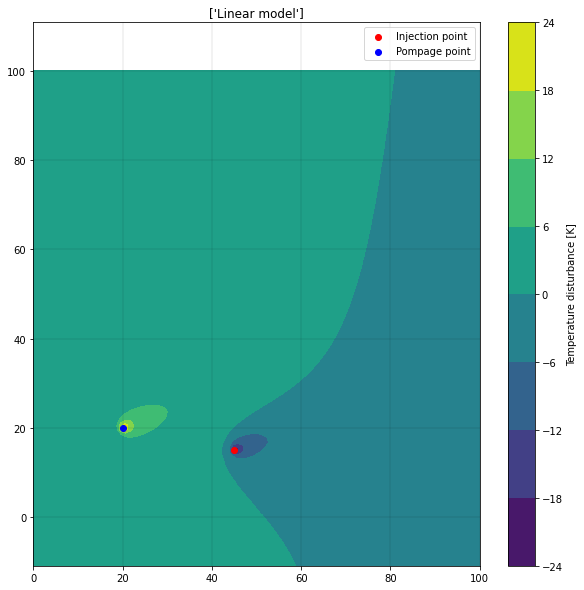

In [5]:
#code source ATTARD

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.special import erf,erfc,erfcinv

def LAHT(x, y, X0, Y0, alpha, t, Qinj, DTinj,
         b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m):
    
    R = C_m/n/C_w
    
    alpha_rad = -alpha*np.pi/180
    x = x - X0                                                          
    y = y - Y0 
    
    x = np.cos(alpha_rad)*x - np.sin(alpha_rad)*y                  
    y = np.sin(alpha_rad)*x + np.cos(alpha_rad)*y 
    
    rp = np.sqrt(x**2+y**2*alpha_L/alpha_T)
    
    res = Qinj*DTinj/(4*n*b*va*np.sqrt(np.pi*alpha_T))*\
    np.exp((x-rp)/2/alpha_L)*(1/np.sqrt(rp))*\
    erfc((rp-va*t/R)/(2*np.sqrt(va*alpha_L*t/R)))
    
    return res

#definition of your grid from Xmin to Xmax, and from Ymin to Ymax
Xmin = -100
Xmax = 100
xgrid_len = 200

Ymin = -100
Ymax = 100
ygrid_len = 200

#You create your grif of interest
xi = np.linspace(Xmin, Xmax, xgrid_len)                                    
yi = np.linspace(Ymin, Ymax, ygrid_len)                                    
xi, yi = np.meshgrid(xi, yi)

C_m = float(2888000) #volumetric heat capacity porous media (J/ kg / K)
C_w = float(4185000) #volumetric heat capacity water (J/ kg / K)
alpha_L = float(1) #longitudinal dispersivity (m)
alpha_T = float(1) #transverse dispersivity (m)
lambda_m = float(2.24) #thermal conductivity (W/m/K)
 
alpha = float(20) # groundwater flow angle
K = float(0.001) #permeability (m/s)
b = float(40) #aquifer thickness [m]
grad_h = float(0.001) #hydraulic gradient
n = float(0.2) #effective porosity
 
v0 = K*grad_h #darcy velocity
va = v0/n #seepage velocity
R = C_m/(n*C_w) #retardation factor
 
#We also define the location of the hot water injection
Xpump, Ypump = 20, 20
Xinj, Yinj = 45, 15

DTinj = -10. #temperature difference between pumping and reinjection
DTpump = 10. #temperature difference between pumping and reinjection

Qinj = 1/3600 #injection rate m3/s
time = 365*24*3600 # operation time in seconds (365 days)


deltaT_inj = LAHT(xi, yi, Xinj, Yinj, alpha, time, Qinj, DTinj, b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m)
deltaT_pump = LAHT(xi, yi, Xpump, Ypump, alpha, time, Qinj, DTpump, b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m)

%matplotlib inline
#We define the titles of our subplots
titles =["Linear model"]

results = deltaT_inj + deltaT_pump
 
fig, axs = plt.subplots(1,1, figsize=(10,10))
ax = axs
ax.set_title(titles)
ax.axis('equal')
#cf= ax.contourf(xi, yi, results, [1,2,3,4,5,6,7,8,9,10], cmap='viridis') # analytical contour (1 K disturbance)
cf= ax.contourf(xi, yi, results, cmap='viridis') # analytical contour (1 K disturbance)

ax.grid(color='black', linestyle='-', linewidth=0.1)
ax.scatter(Xinj, Yinj, color='red', label = "Injection point")   
ax.scatter(Xpump, Ypump, color='blue', label = "Pompage point")   

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.legend()
 
fig.colorbar(cf,label = "Temperature disturbance [K]")
 
plt.show()

In [21]:
13*365

4745